In [297]:
# Libraries for Webscraping and text cleaning
import requests
from bs4 import BeautifulSoup
import re

# Libraries for Word Cloud
from os import path
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [377]:
def get_song_lyrics(url):
    '''
    Input: Full URL from Lyrics Freak as a string
    This function finds all song links listed for a band on Lyrics Freak, cleans the text, and then returns it
    Output: Returns a list of lyrics and a string containing them all combined
    '''
    
    try: 
        # Finds the band name from the URL
        band = re.search("http.*/(.*)/$", url).group(1)

        # Visits the URL and parses the html
        r = requests.get(url)
    except: 
        print("Invalid URL")

    data = r.text
    soup = BeautifulSoup(data, "lxml")
    
    # List comprehension to grab all links containing the songs by the band
    links = [x.get('href') for x in soup.find_all('a')]
    song_links = [song for song in links if band in str(song)]
    
    lyricsList = []
    # Visit each link, grab the lyrics and append it to a list
    for song in song_links:
        s = requests.get("http://www.lyricsfreak.com" + song)
        s_text = s.text
        songSoup = BeautifulSoup(s_text, "lxml")

        lyrics = songSoup.find(id="content_h")
        lyrics_clean = re.search(r'(<div.*id="content_h">)(.*)(</div>)', str(lyrics))
        if lyrics_clean is not None:
            lyricsList.append(lyrics_clean.group(2).replace("<br/>", " "))
    
    # Create a single string containing all lyrics
    all_lyrics = " ".join(lyricsList)
    
    return lyricsList, all_lyrics


def colored(word, font_size, position, orientation, random_state=None, **kwargs):
    '''
    Input: No need to pass anything to this
    Sets the color in HSL format
    Output: Returns color map
    
    '''
    return "hsl(0, 100%%, %d%%)" % random.randint(60, 100)


def make_image_cloud(lyrics, picture=None, bgColor = 'black', wordCount=1000, useImageColors = 0):
    '''
    Input: name of a picture stored in the same directory as the script/notebook, background color you want to use
    This function makes use of the WordCloud library by Andy Mueller (https://github.com/amueller/word_cloud).
    It masks the word cloud onto a picture, results vary on the picture used. 
    Output: Saves picture to the current working directory
    '''
    if picture is not None:
        imageMask = np.array(Image.open(picture));
    else:
        imageMask = None
        picture = "Picture"

    stopwords = set(STOPWORDS)
    stopwords.add("said")

    wc = WordCloud(scale = 4,  background_color=bgColor, max_words=wordCount, mask=imageMask,
                   stopwords=stopwords, color_func = colored)
    
    wc.generate(lyrics)
    
    if useImageColors:
        image_colors = ImageColorGenerator(imageMask)   
        wc = wc.recolor(color_func=image_colors)

    wc.to_file(picture + "_cloud" + ".png")

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Notes   
1) Use URLs from lyrics freak in the form: http://www.lyricsfreak.com/a/artist/   
2) Some images may not work as a mask

# Foo Fighters

In [378]:
foo_lyricsList, foo_lyrics = get_song_lyrics("http://www.lyricsfreak.com/f/foo+fighters/")

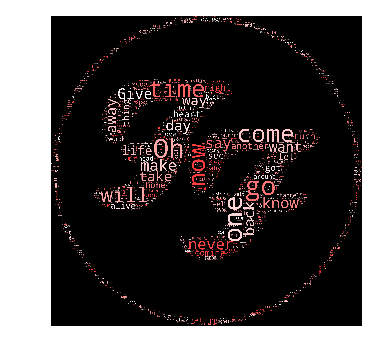

In [379]:
make_image_cloud(lyrics = foo_lyrics, picture = "ff.jpg", bgColor = "black")

# Red Hot Chili Peppers

In [380]:
rhcp_lyricsList, rhcp_lyrics = get_song_lyrics("http://www.lyricsfreak.com/r/red+hot+chili+peppers/")

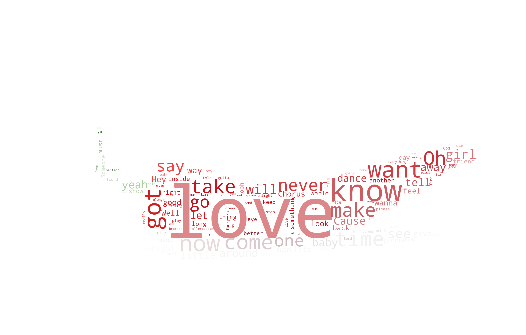

In [381]:
make_image_cloud(lyrics = rhcp_lyrics, picture = "chilipepper.jpg", bgColor = "white", useImageColors = 1)